<a href="https://colab.research.google.com/github/ibrahimelawady/data-portfolio/blob/main/project_01_flight_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7698 non-null   int64  
 1   1       7698 non-null   object 
 2   2       7649 non-null   object 
 3   3       7698 non-null   object 
 4   4       7698 non-null   object 
 5   5       7698 non-null   object 
 6   6       7698 non-null   float64
 7   7       7698 non-null   float64
 8   8       7698 non-null   int64  
 9   9       7698 non-null   object 
 10  10      7698 non-null   object 
 11  11      7698 non-null   object 
 12  12      7698 non-null   object 
 13  13      7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


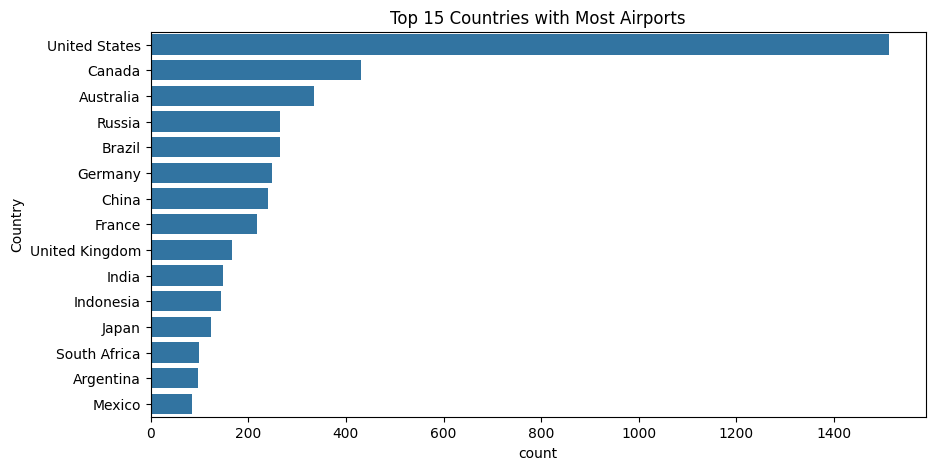

In [2]:
# --- Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Load dataset
# (لو عندك CSV على جهازك هنعمل upload، مبدئيًا استخدم ده مؤقت)
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
df = pd.read_csv(url, header=None)

# --- Step 3: نظرة أولية
df.head()
df.info()
df.describe()

# --- Step 4: Rename columns (مبدئيًا عشان الأسماء مش واضحة)
df.columns = [
    "Airport_ID", "Name", "City", "Country",
    "IATA", "ICAO", "Latitude", "Longitude",
    "Altitude", "Timezone", "DST", "Tz_database_time_zone", "Type", "Source"
]
df.head()

# --- Step 5: Missing values check
df.isnull().sum()

# --- Step 6: Visualization examples
plt.figure(figsize=(10,5))
sns.countplot(y=df["Country"], order=df["Country"].value_counts().head(15).index)
plt.title("Top 15 Countries with Most Airports")
plt.show()


In [4]:
# ===== imports & basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# لو الملف اتحمل عندك محلياً في النوتبوك، استخدمه؛ لو لا اتأكد ان df موجود من بداية الشغل
# هنا نفترض df موجود كما بالنسخة اللي شغلتها
# لو محتاج تحمل من الريبو/رابط، قلّي وانا أديك كود التحميل.

# Rename columns (لو لسه ما عملتها)
df.columns = [
    "Airport_ID","Name","City","Country",
    "IATA","ICAO","Latitude","Longitude",
    "Altitude","Timezone","DST","Tz_database_time_zone","Type","Source"
]

# Drop duplicates & ensure numeric altitude
df = df.drop_duplicates().copy()
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

# Quick checks
print("Shape:", df.shape)
print("Nulls per column:")
print(df.isnull().sum())
df.head()


Shape: (7698, 14)
Nulls per column:
Airport_ID                0
Name                      0
City                     49
Country                   0
IATA                      0
ICAO                      0
Latitude                  0
Longitude                 0
Altitude                  0
Timezone                  0
DST                       0
Tz_database_time_zone     0
Type                      0
Source                    0
dtype: int64


,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


/tmp/ipython-input-1243318638.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_c.values, y=top_c.index, palette='viridis')


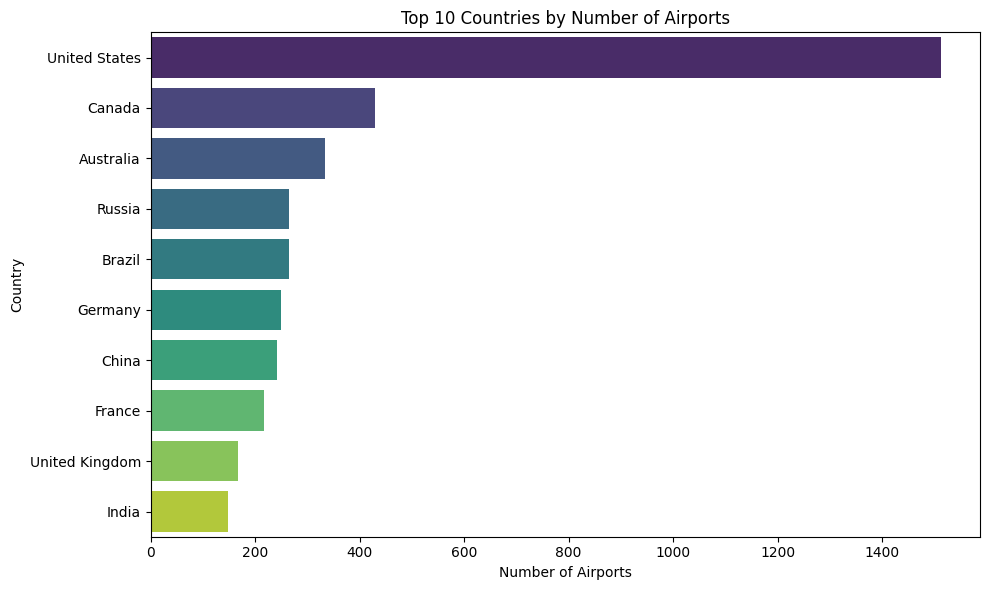

In [5]:
# Top 10 countries
os.makedirs('project_01_flight_eda/assets', exist_ok=True)

plt.figure(figsize=(10,6))
top_c = df['Country'].value_counts().head(10)
sns.barplot(x=top_c.values, y=top_c.index, palette='viridis')
plt.title('Top 10 Countries by Number of Airports')
plt.xlabel('Number of Airports')
plt.tight_layout()
plt.savefig('project_01_flight_eda/assets/top10_countries.png', bbox_inches='tight', dpi=150)
plt.show()


### Insight — Top 10 Countries
The USA appears as the top country by number of airports (X airports). This suggests a high airport density and well-developed air infrastructure. Possible follow-ups: analyze number of major vs small airports, or compare airports per population.


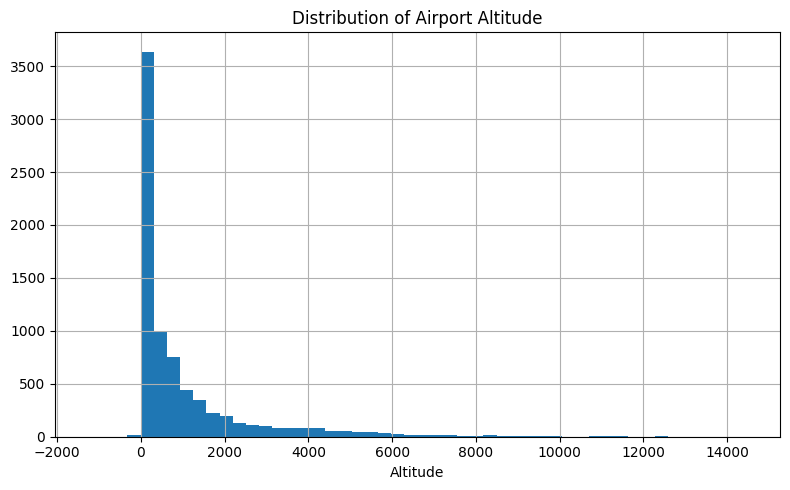

In [7]:
plt.figure(figsize=(8,5))
df['Altitude'].dropna().hist(bins=50)
plt.title('Distribution of Airport Altitude')
plt.xlabel('Altitude')
plt.tight_layout()
plt.savefig('project_01_flight_eda/assets/altitude_hist.png', bbox_inches='tight', dpi=150)
plt.show()


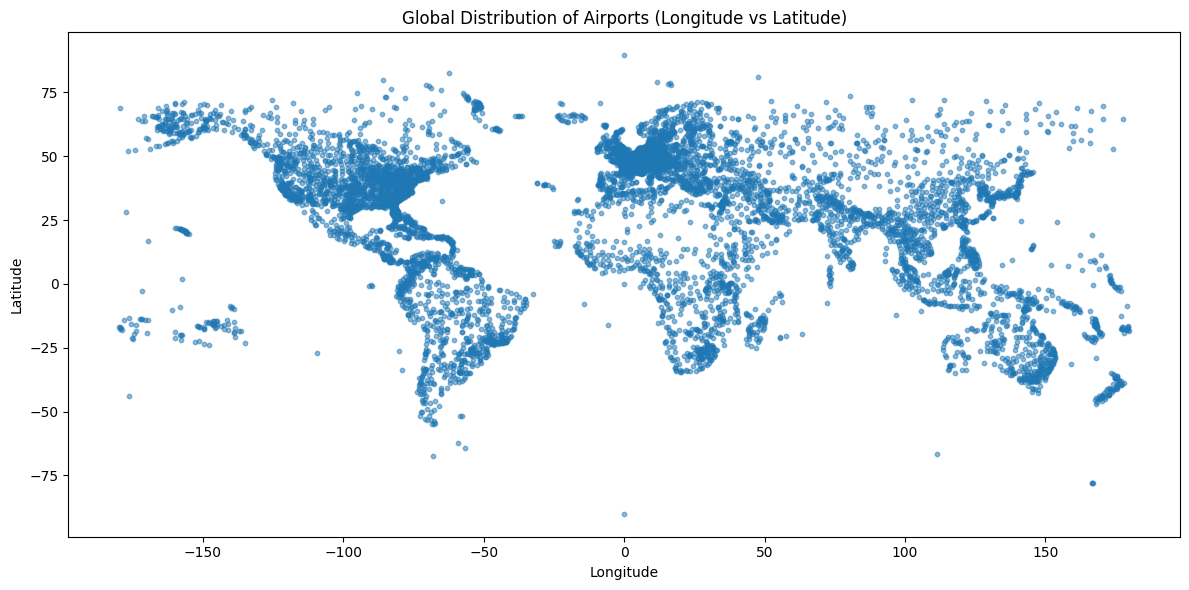

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(df['Longitude'], df['Latitude'], s=10, alpha=0.5)
plt.title('Global Distribution of Airports (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig('project_01_flight_eda/assets/latlon_scatter.png', bbox_inches='tight', dpi=150)
plt.show()


In [9]:
top_country = top_c.index[0]
top_country_count = int(top_c.iloc[0])
mean_alt = df['Altitude'].dropna().mean()
median_alt = df['Altitude'].dropna().median()
total_airports = len(df)

print(f"Top country: {top_country} ({top_country_count} airports)")
print(f"Total airports in dataset: {total_airports}")
print(f"Mean altitude: {mean_alt:.1f}, Median altitude: {median_alt:.1f}")


Top country: United States (1512 airports)
Total airports in dataset: 7698
Mean altitude: 1015.9, Median altitude: 352.0


In [10]:
cols = ['Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude']
clean = df[cols].copy()
clean.to_csv('project_01_flight_eda/cleaned_data.csv', index=False)


from google.colab import files
files.download('project_01_flight_eda/cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>